### Data Science and Business Analytics Internship

#### By Arvind Bhakuni Intern at The Sparks Foundations

#### Task 1: Prediction using Supervised ML

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [128]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

In [129]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [130]:
df.shape

(25, 2)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [132]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [133]:
# checking the correlation between Hours and Scores
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


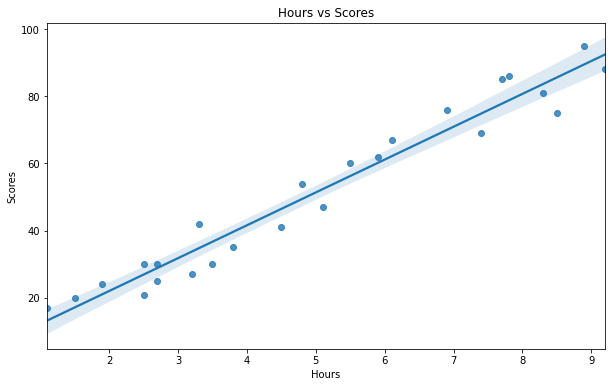

In [134]:
plt.figure(figsize=(10,6))
sns.regplot(x='Hours', y='Scores', data=df)
plt.title('Hours vs Scores')
plt.show()

#### From the above graph, we see that the more you study, more marks you get.
#### we can see that there is a positive linear relation between hours and score.

C:\Arvind documents\comedians-project1\venvml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

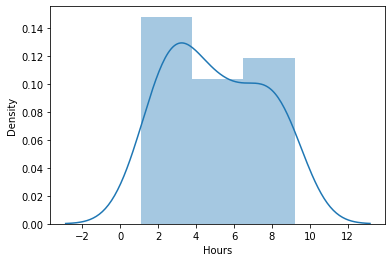

In [135]:
sns.distplot(df['Hours'])

C:\Arvind documents\comedians-project1\venvml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

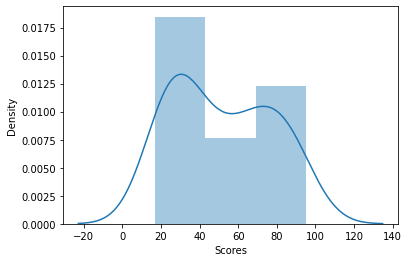

In [136]:
sns.distplot(df['Scores'])

In [137]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [138]:
X = df.Hours.values
y = df.Scores.values

In [139]:
X = X.reshape(-1,1)

##### Import train_test_split from sklearn.model_selection

In [140]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##### Training the model

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
reg = LinearRegression()

In [156]:
reg.fit(X_train, y_train)

LinearRegression()

In [157]:
# the coefficients
print("Coefficients: ", reg.coef_)

Coefficients:  [9.71409219]


### Predictions from our model

In [158]:
# make predictions using the testing set
predictions = reg.predict(X_test)

In [159]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [161]:
print('Mean absolute error: %.2f'%mean_absolute_error(y_test, predictions))
print('Mean squared error: %.2f'%mean_squared_error(y_test, predictions))
print('Root mean squared error: %.2f'%np.sqrt(mean_squared_error(y_test, predictions)))
print(f'Coefficient of determination or Accuracy score: {r2_score(y_test, predictions)}')


Mean absolute error: 4.43
Mean squared error: 23.52
Root mean squared error: 4.85
Coefficient of determination or Accuracy score: 0.9553509219739938


#### The coefficient of determination: 1 is perfect prediction

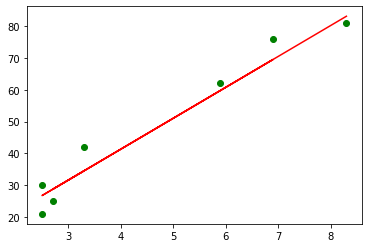

In [162]:
# Let's grab predictions off our test set and see how well it did!
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, predictions, color='red')
plt.show()

### Residuals
It is a good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

C:\Arvind documents\comedians-project1\venvml\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

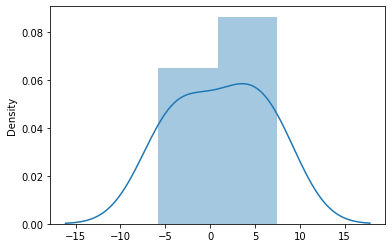

In [163]:
sns.distplot((y_test-predictions))

In [164]:
# now plotting the regression line
line = reg.coef_ * X + reg.intercept_

### Predicting the outcome

In [165]:
hours = [[9.25]]
study_prediction = reg.predict(hours)
print(f"No of Hours studied : {hours[0]}")
print(f"Predicted Score : {round(study_prediction[0], 2)}%")

No of Hours studied : [9.25]
Predicted Score : 92.34%
